importing the dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



imporying the boston house price dataset

In [9]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()


In [10]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

loading the dataset to a pandas dataframe

In [11]:
house_price_dataframe=pd.DataFrame(housing.data)


printing first five data

In [12]:
house_price_dataframe.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
house_price_dataframe=pd.DataFrame(housing.data, columns= housing.feature_names)

In [17]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


add  the target columm(price) to dataframe

In [19]:
house_price_dataframe['price'] = housing.target

In [20]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


checking the number of rows and column in the dataframe

In [23]:
house_price_dataframe.shape

(20640, 9)

check for missing values.........gives number of missing values in each column

In [24]:
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

statistical methods of this data

In [26]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


understanding the correlation between various features in the dataset... (CORRELATION VARIABLE WILL CHECK CORRELATION OF EACH COLUMN WITH ALL OTHEFR REMAINING COLUMN)

basically there are two types of correlation
1. positive corelation
       ... if we take any two columns and if the value of first column is DIRECTLY proportional to the value of second column( badha to badha)


2. negative correlation

     ... if we take any two columns and if the value of first column is INVERSELY proportional to the value of second column( badha to ghata)



In [27]:
correlation = house_price_dataframe.corr()

constructing a heatmap to understand the correlation

<Axes: >

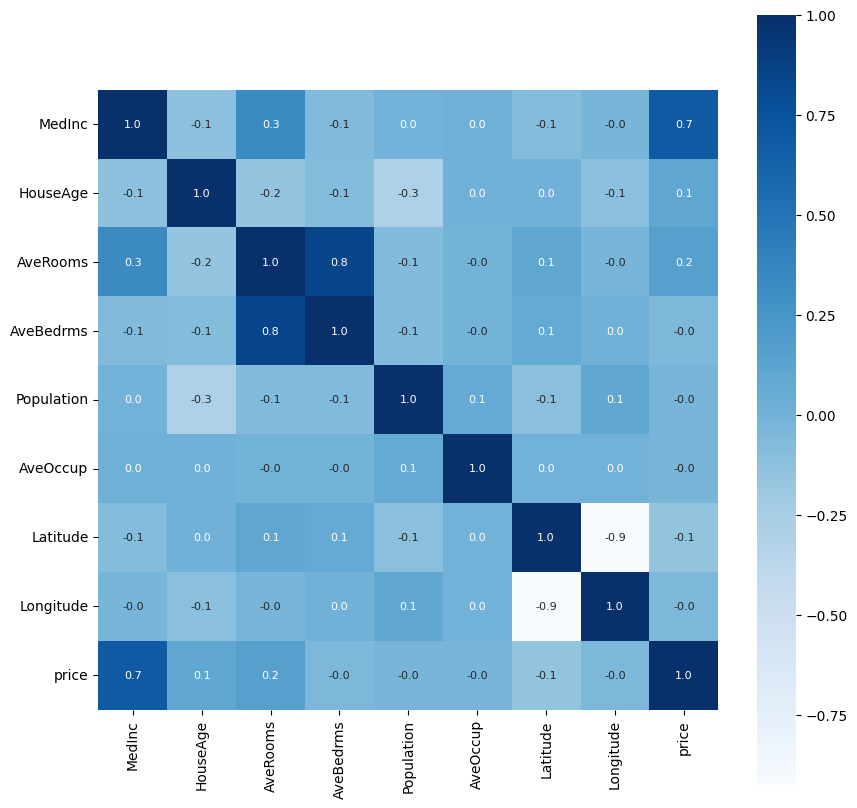

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

splitting the data and the target(price)  so that the machine learning model can learn what price in what data


ondropping a column mention axis =1 and on dropping row mention axis =0

In [31]:
X=house_price_dataframe.drop(['price'] , axis=1)
Y=house_price_dataframe['price']

In [32]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923

Splitting the data into training data and test data

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


model training

XGBoost Regressor model....its a decison tree model

loading the model...already imported

In [35]:
model=XGBRegressor()

training the model with X_train

In [38]:
model.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

evaluation

prediction on training data

trying to get the accuracy of training data.....by giving the xtrain and seeing whether it gives correct ytrain

In [39]:
training_data_prediction = model.predict(X_train)

In [40]:
print(training_data_prediction)

[0.6893792  2.986824   0.48874274 ... 1.8632544  1.7800125  0.7565893 ]


In [41]:
#r squared error
score_1=metrics.r2_score(Y_train,training_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R squared error : ",score_1)
print("mean absolute error: ",score_2)

R squared error :  0.9451221492760822
mean absolute error:  0.1919170860794262


values are small...so model is performing well ...if values are large then error

visualizing the actual pricees and predicted prices

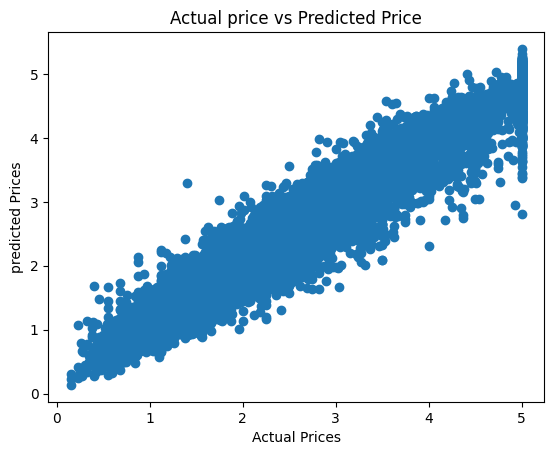

In [47]:
plt.scatter(Y_train , training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("predicted Prices")
plt.title("Actual price vs Predicted Price")
plt.show()

now...prediction on test data

In [42]:
test_data_prediction = model.predict(X_test)

In [43]:
print(test_data_prediction)

[2.787383  1.9628428 0.782536  ... 1.5060123 0.8763797 1.9317917]


In [44]:
#r squared error
score_1=metrics.r2_score(Y_test,test_data_prediction)

#mean absolute error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error : ",score_1)
print("mean absolute error: ",score_2)

R squared error :  0.8412904408180302
mean absolute error:  0.30753655785801337


so model is performing well as not much error